In [29]:
# CoDe 1161 OpenData Project: 
# Women's Primary Completion Rate
# by Hongjun Qian

# This project is motivated by the concern of women education. The aim of this project is to analyze the 

# Primary completion rate: The primary completion rate is calculated as the number of new students entering the last grade of primary education (enrolments minus repeaters), regardless of age, divided by the population at the entrance age for the last grade of primary education. 



In [30]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [31]:
%matplotlib inline

In [32]:
plt.rcParams["figure.figsize"] = (10, 5)

In [33]:
saved_style_state = matplotlib.rcParams.copy() 

In [34]:
edu_data = pd.read_csv("primary_education_data.csv")
print("done")

done


In [35]:
edu_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,101.255234,101.55587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,66.028069,66.26329,66.115013,66.932449,68.167793,69.499100,69.990547,70.825378,NaN,NaN
2,Afghanistan,AFG,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,63.604069,66.688881,67.129303,65.761513,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,64.063690,64.65110,65.822060,66.608093,66.362289,66.722877,66.927361,67.231689,NaN,NaN
4,Angola,AGO,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


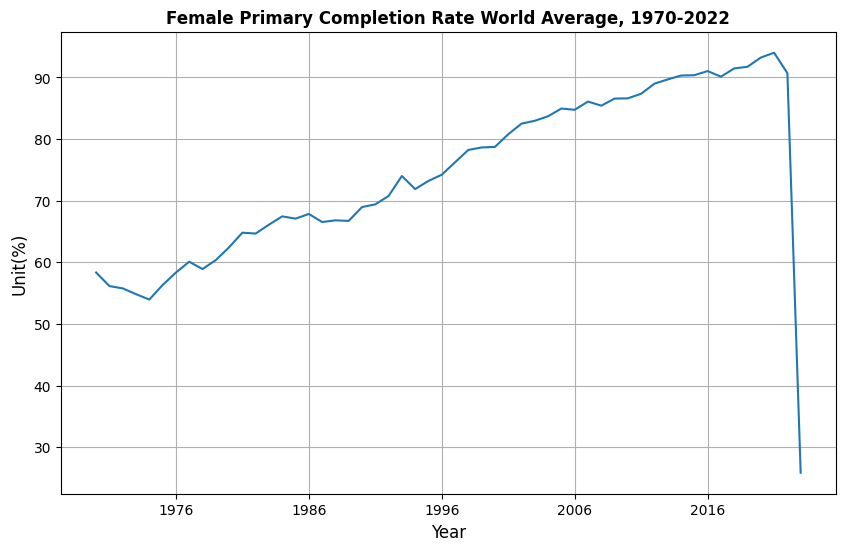

In [130]:
def col_mean(col):
    try :

        return col.mean()
    except:
        pass

edu_data.apply(col_mean,axis=0).plot(figsize=(10, 6))

plt.ylabel("Unit(%)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.title("Female Primary Completion Rate World Average, 1970-2022", weight="bold")
plt.grid(True)


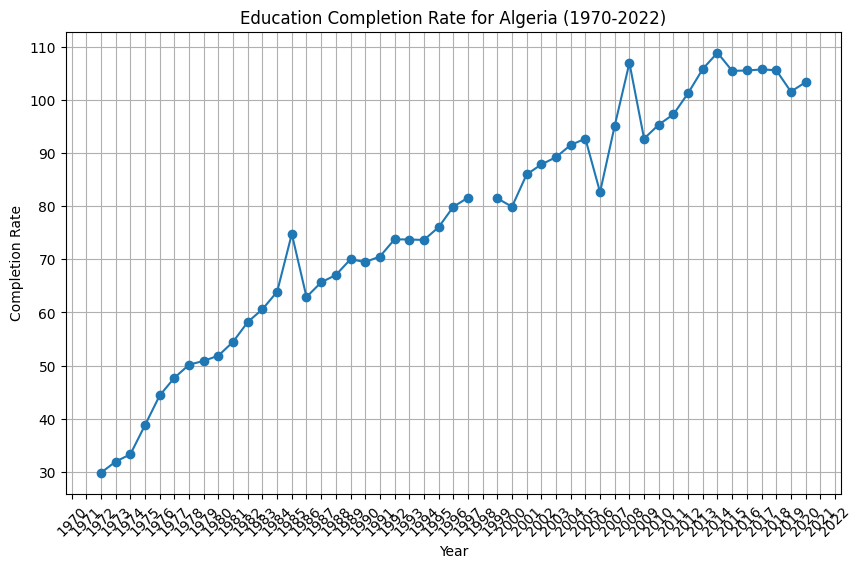

In [179]:
# Select columns for the years 1970 to 2022 and the specific country (e.g., Algeria)
years = [str(year) for year in range(1970, 2023)]
country_name = 'Algeria'

# Extract completion rates for the years 1970 to 2022
completion_rates = country_data[years].values.flatten()

# Plot a line graph for the completion rates
plt.figure(figsize=(10, 6))
plt.plot(years, completion_rates, marker='o')
plt.title(f'Education Completion Rate for {country_name} (1970-2022)')
plt.xlabel('Year')
plt.ylabel('Completion Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

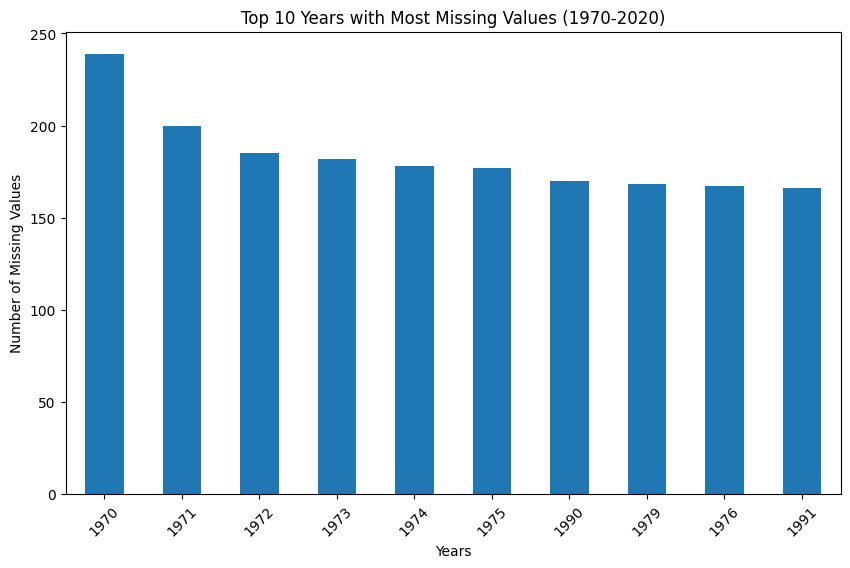

In [149]:
years = [str(year) for year in range(1970, 2021)]
df_selected_years = edu_data[years]


missing_values_per_country = df_selected_years.isnull().sum(axis=0)

top_missing_countries = missing_values_per_country.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_missing_countries.plot(kind='bar')
plt.title('Top 10 Years with Most Missing Values (1970-2020)')
plt.xlabel('Years')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Primary Completion Rate World Average, Female, 2022')

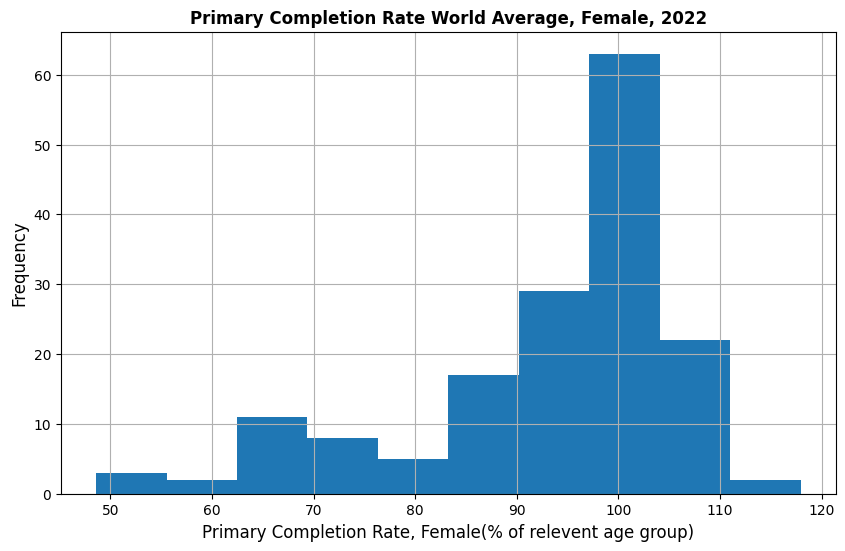

In [127]:
edu_data["2020"].hist(figsize=(10, 6))
plt.ylabel("Frequency", fontsize=12)
plt.xlabel("Primary Completion Rate, Female(% of relevent age group)", fontsize=12)
plt.title("Primary Completion Rate World Average, Female, 2022", weight="bold")

Text(0.5, 1.0, 'Top 10 Countries for Highest Female Primary Completion Rate, 1970-2022')

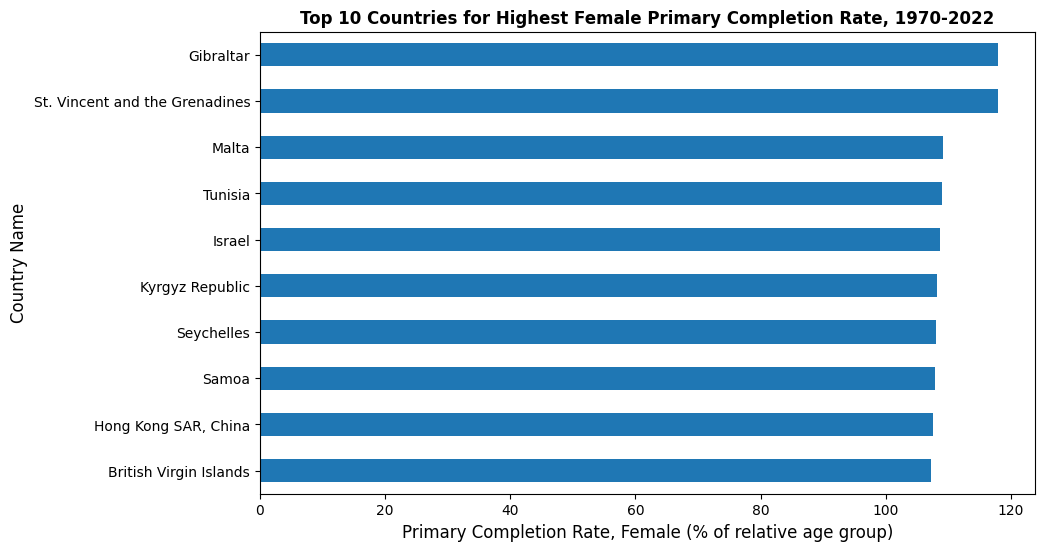

In [162]:
largest = edu_data.nlargest(10, ["2020"]) 
largest.set_index("Country Name")["2020"].plot(figsize=(10, 6), kind="barh")

plt.xlabel("Primary Completion Rate, Female (% of relative age group)", fontsize=12)
plt.ylabel("Country Name", fontsize=12)
plt.gca().invert_yaxis()
plt.title("Top 10 Countries for Highest Female Primary Completion Rate, 1970-2022", weight="bold")

In [40]:
import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


edu_path = r'C:\Users\13766\1161\data_project_2023\primary_education_data.csv'

In [41]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [42]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
edu_data = pd.read_csv("C:\\Users\\13766\\1161\\data_project_2023\\primary_education_data.csv")
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

C:\Users\13766\AppData\Local\Temp\ipykernel_11996\3493916857.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))


In [43]:
edc = set(edu_data["Country Name"])
wcc = set(world.name)
print(len(edc), len(wcc))
print(list(edc - wcc))

266 176
['Aruba', 'Palau', 'Pre-demographic dividend', 'East Asia & Pacific', 'San Marino', 'Guam', 'Dominican Republic', 'Arab World', 'Caribbean small states', 'Euro area', 'Isle of Man', 'IDA blend', 'Venezuela, RB', 'Upper middle income', 'Bahamas, The', 'Syrian Arab Republic', 'East Asia & Pacific (excluding high income)', 'Low income', 'St. Kitts and Nevis', 'World', 'European Union', 'Grenada', 'IDA only', "Korea, Dem. People's Rep.", 'Singapore', 'Cabo Verde', 'Middle East & North Africa (IDA & IBRD countries)', 'Monaco', 'British Virgin Islands', 'Sao Tome and Principe', 'Northern Mariana Islands', 'Latin America & Caribbean (excluding high income)', 'Curacao', 'United States', 'St. Lucia', 'Kiribati', 'Bermuda', 'Least developed countries: UN classification', 'Congo, Rep.', 'Maldives', 'Middle East & North Africa', 'Not classified', 'Lao PDR', 'Yemen, Rep.', 'Korea, Rep.', 'Egypt, Arab Rep.', 'Latin America & the Caribbean (IDA & IBRD countries)', 'Faroe Islands', 'Tuvalu', '

In [44]:
'FJI' in list(world.iso_a3)

True

In [45]:
iso_codes = list(world.iso_a3)
overlapping_codes_df = edu_data[[cc in iso_codes for cc in edu_data["Country Code"]]]

In [46]:
merged_df = overlapping_codes_df.merge(world, left_on='Country Code', right_on='iso_a3')
merged_df = gp.GeoDataFrame(merged_df)
merged_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2019,2020,2021,2022,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,Afghanistan,AFG,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,65.761513,NaN,NaN,NaN,38041754.0,Asia,Afghanistan,AFG,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,Angola,AGO,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31825295.0,Africa,Angola,AGO,88815,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
2,Albania,ALB,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,104.520432,103.379494,99.446632,NaN,2854191.0,Europe,Albania,ALB,15279,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,United Arab Emirates,ARE,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,112.561798,104.618607,NaN,NaN,9770529.0,Asia,United Arab Emirates,ARE,421142,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,Argentina,ARG,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,98.176582,101.582382,NaN,NaN,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


Text(0.5, 1.0, 'World Female Primary Completion Rate, 2018')

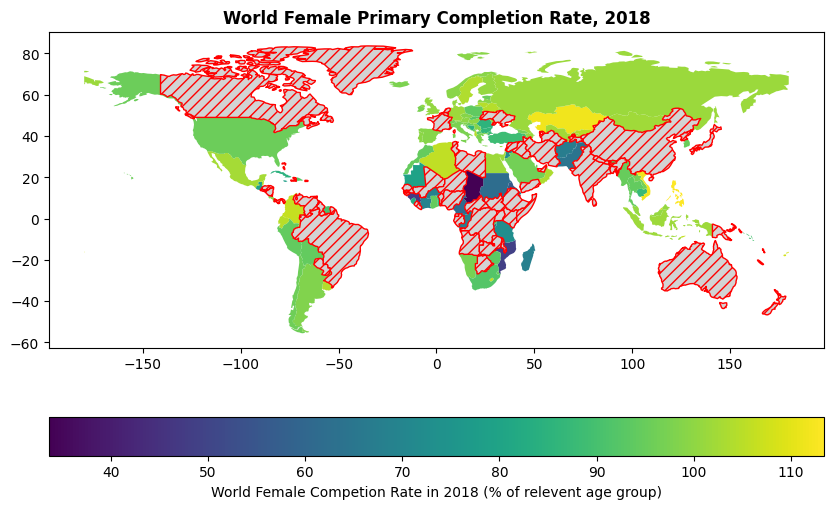

In [141]:
merged_df.plot(
    column="2018", 
    figsize=(10, 6),
    legend=True,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
    legend_kwds={"label": "World Female Competion Rate in 2018 (% of relevent age group)", "orientation": "horizontal"}
    )

plt.title("World Female Primary Completion Rate, 2018", weight="bold")

Text(0.5, 1.0, 'World Female Primary Completion Rate, 2008')

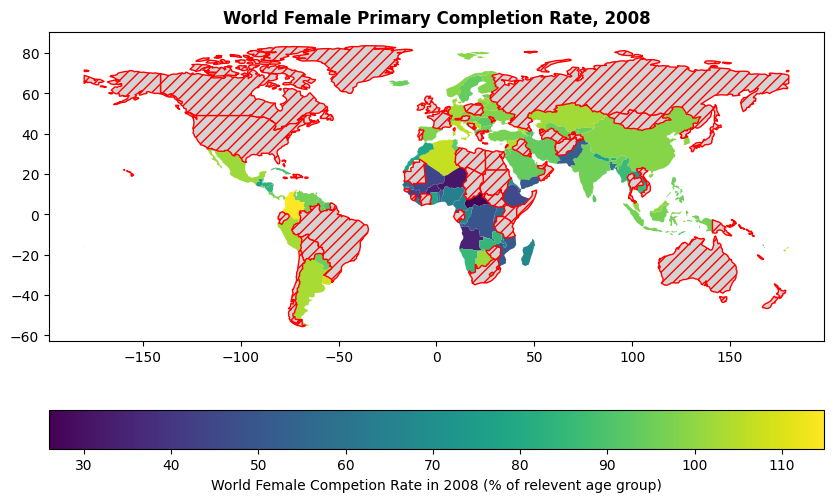

In [145]:
merged_df.plot(
    column="2008", 
    figsize=(10, 6),
    legend=True,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
    legend_kwds={"label": "World Female Competion Rate in 2008 (% of relevent age group)", "orientation": "horizontal"}
    )

plt.title("World Female Primary Completion Rate, 2008", weight="bold")

[]

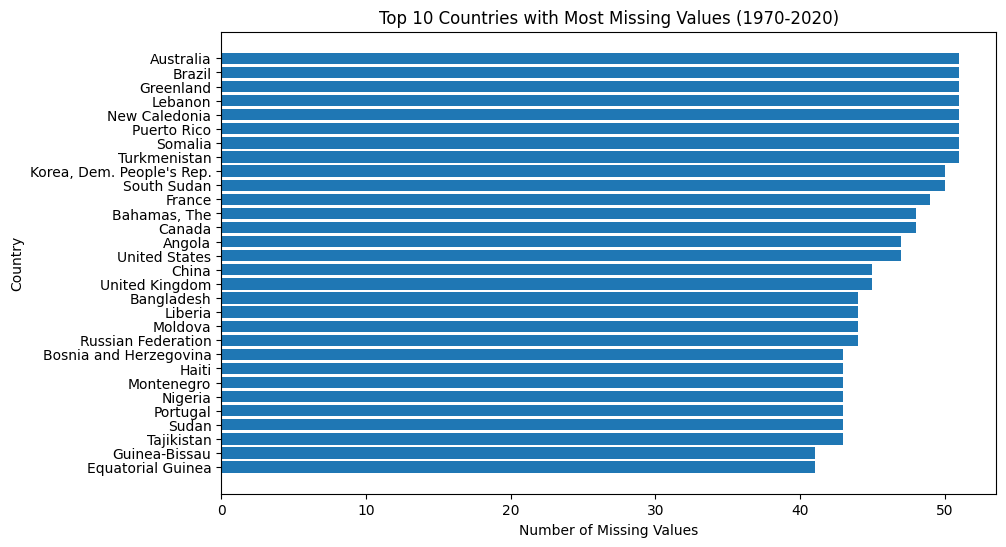

In [161]:
merged_df["Missing Values"] = merged_df[years].isnull().sum(axis=1)

top_missing_countries = merged_df.nlargest(30, "Missing Values")


plt.figure(figsize=(10, 6))
plt.barh(top_missing_countries["Country Name"], top_missing_countries["Missing Values"])
plt.title('Top 10 Countries with Most Missing Values (1970-2020)')
plt.xlabel('Number of Missing Values')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.plot()